In [104]:
import numpy as np
import pandas as pd
from pandas_datareader import data, wb
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import math
import datetime as dt
import plotly
import cufflinks as cf
cf.go_offline()
%matplotlib inline
import matplotlib.dates as mdates
import matplotlib.ticker as mticker

In [105]:
#Set Duration
start = dt.datetime(2018,6,26)
end = dt.datetime.now()

In [106]:
crypto_currency='ADA'
against_currency='USD'

In [107]:
df = data.DataReader(f'{crypto_currency}-{against_currency}','yahoo',start,end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-06-24,0.138254,0.128556,0.132321,0.135269,57752100.0,0.135269
2018-06-25,0.136055,0.126099,0.135623,0.126099,32927500.0,0.126099
2018-06-26,0.128000,0.123925,0.126551,0.127444,37072400.0,0.127444
2018-06-27,0.128503,0.118498,0.127393,0.119320,42250100.0,0.119320
2018-06-28,0.127436,0.114674,0.119397,0.125720,65802200.0,0.125720


In [108]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-06-22,1.305561,1.111894,1.155804,1.252896,4.931021e+09,1.252896
2021-06-23,1.398589,1.206899,1.251410,1.356087,3.368354e+09,1.356087
2021-06-24,1.392683,1.245304,1.359522,1.256478,4.343177e+09,1.256478
2021-06-25,1.291396,1.198573,1.254301,1.250440,3.241468e+09,1.250440
2021-06-27,1.303137,1.251427,1.251427,1.279827,3.146398e+09,1.279827


In [109]:
df.shape

(1095, 6)

In [110]:
#Exploratory Data Analysis
#Maximum Closing Price
df.xs(key='Close',axis=1).max() # getting the maximum close value

2.309113025665283

In [111]:
#Visualization (Closing Price)
df.xs(key='Close',axis=1).iplot()

In [112]:
#Candle stick Graph
df0 = df[['Open','High','Low','Close']].loc['2019-07-12':'2020-07-12']
df0.iplot(kind='candle')

In [113]:
#Visualization of Simple Moving Average
df['Close'].loc['2019-07-10':'2020-07-10'].ta_plot(study='sma',periods=[9,18,27])

In [114]:
df['Close']

Date
2018-06-24    0.135269
2018-06-25    0.126099
2018-06-26    0.127444
2018-06-27    0.119320
2018-06-28    0.125720
                ...   
2021-06-22    1.252896
2021-06-23    1.356087
2021-06-24    1.256478
2021-06-25    1.250440
2021-06-27    1.279827
Name: Close, Length: 1095, dtype: float64

In [115]:
#Resetting the index to Closing Price
df1=df.reset_index()['Close']

In [116]:
df1

0       0.135269
1       0.126099
2       0.127444
3       0.119320
4       0.125720
          ...   
1090    1.252896
1091    1.356087
1092    1.256478
1093    1.250440
1094    1.279827
Name: Close, Length: 1095, dtype: float64

In [117]:
#Scaling the data using Minmax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [118]:
df1.shape

(1095, 1)

In [119]:
#number of days we are going to predict
pred_days=30

In [120]:
#Splitting the close column of the dataset into x_train and y_train for training the model
x_train, y_train = [], []
for x in range(pred_days,len(df1)):
    x_train.append(df1[x-pred_days:x, 0])
    y_train.append(df1[x, 0])

In [121]:
len(x_train),len(y_train)

(1065, 1065)

In [122]:
#Conversion of list into arrays 
x_train,y_train=np.array(x_train),np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train=np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [123]:
x_train.shape, y_train.shape

((1065, 30, 1), (1065, 30, 1))

In [124]:
#Importing the required modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.layers import LSTM

In [125]:
#Stacked LSTM Model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 30, 50)            10400     
_________________________________________________________________
dropout_6 (Dropout)          (None, 30, 50)            0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 30, 50)            20200     
_________________________________________________________________
dropout_7 (Dropout)          (None, 30, 50)            0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dropout_8 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                

In [126]:
#Fitting the model by giving the data 30 times to the model
history=model.fit(x_train, y_train, epochs=30, batch_size=32,verbose=1)

Epoch 1/30
34/34 [==============================] - 11s 33ms/step - loss: 0.0071
Epoch 2/30
34/34 [==============================] - 1s 33ms/step - loss: 0.0019
Epoch 3/30
34/34 [==============================] - 1s 33ms/step - loss: 0.0019
Epoch 4/30
34/34 [==============================] - 1s 32ms/step - loss: 0.0017
Epoch 5/30
34/34 [==============================] - 1s 33ms/step - loss: 0.0016
Epoch 6/30
34/34 [==============================] - 1s 33ms/step - loss: 0.0018
Epoch 7/30
34/34 [==============================] - 1s 34ms/step - loss: 0.0017
Epoch 8/30
34/34 [==============================] - 1s 36ms/step - loss: 0.0014
Epoch 9/30
34/34 [==============================] - 1s 33ms/step - loss: 0.0015
Epoch 10/30
34/34 [==============================] - 1s 33ms/step - loss: 0.0014
Epoch 11/30
34/34 [==============================] - 1s 33ms/step - loss: 0.0019
Epoch 12/30
34/34 [==============================] - 1s 33ms/step - loss: 0.0015
Epoch 13/30
34/34 [=================

In [152]:
print(history.history('Loss'))

TypeError: 'dict' object is not callable

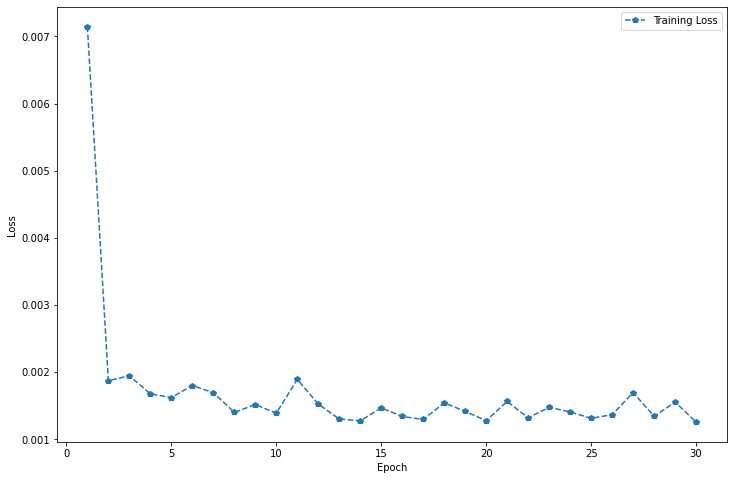

In [127]:
#Variation in loss as the epoches increase
loss = history.history['loss']
epoch_count = range(1, len(loss) + 1)
plt.figure(figsize=(12,8))
plt.plot(epoch_count, loss, 'p--')
plt.legend(['Training Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

In [128]:
#Test dataset is taken
test_start = dt.datetime(2021,1,1)
test_end = dt.datetime.now()

test_data = data.DataReader(f"{crypto_currency}-{against_currency}", "yahoo", test_start, test_end)

In [129]:
test_data.index = pd.to_datetime(test_data.index)

In [130]:
test_data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-31,0.185749,0.176594,0.184034,0.181397,1132268397,0.181397
2021-01-01,0.184246,0.172022,0.181382,0.175350,1122218004,0.175350
2021-01-02,0.184253,0.169233,0.175359,0.177423,1408849504,0.177423
2021-01-03,0.208679,0.173376,0.177382,0.204995,2303857909,0.204995
2021-01-04,0.239661,0.194450,0.205236,0.224762,3260699086,0.224762
...,...,...,...,...,...,...
2021-06-22,1.305561,1.111894,1.155804,1.252896,4931021068,1.252896
2021-06-23,1.398589,1.206899,1.251410,1.356087,3368353999,1.356087
2021-06-24,1.392683,1.245304,1.359522,1.256478,4343177013,1.256478


In [131]:
test_data.describe()

,High,Low,Open,Close,Volume,Adj Close
count,179.000000,179.000000,179.000000,179.000000,1.790000e+02,179.000000
mean,1.176219,1.038474,1.108958,1.115413,5.327776e+09,1.115413
std,0.514765,0.451002,0.486784,0.482630,3.263637e+09,0.482630
min,0.184246,0.169233,0.175359,0.175350,1.122218e+09,0.175350
25%,0.929187,0.825318,0.880890,0.898319,2.989116e+09,0.898319
50%,1.249876,1.165118,1.196326,1.202541,4.266752e+09,1.202541
75%,1.494165,1.327094,1.422315,1.423069,6.691853e+09,1.423069
max,2.461766,2.013285,2.300190,2.309113,1.914198e+10,2.309113


In [132]:
#close column of test data set is stored in actual_prices
actual_prices=test_data['Close']

In [133]:
actual_prices

Date
2020-12-31    0.181397
2021-01-01    0.175350
2021-01-02    0.177423
2021-01-03    0.204995
2021-01-04    0.224762
                ...   
2021-06-22    1.252896
2021-06-23    1.356087
2021-06-24    1.256478
2021-06-25    1.250440
2021-06-27    1.280714
Name: Close, Length: 179, dtype: float64

In [134]:
actual_prices = np.array(actual_prices)
actual_prices

array([0.18139701, 0.17535   , 0.177423  , 0.20499501, 0.22476199,
       0.25831401, 0.331898  , 0.29998001, 0.30559701, 0.332973  ,
       0.30489501, 0.275466  , 0.28700301, 0.313609  , 0.31039599,
       0.30252999, 0.35244399, 0.379852  , 0.37142801, 0.36913699,
       0.37539399, 0.31020901, 0.34957701, 0.34564301, 0.353881  ,
       0.34388599, 0.34423399, 0.31308001, 0.333303  , 0.348131  ,
       0.36261901, 0.34489799, 0.402033  , 0.426247  , 0.44139999,
       0.44105101, 0.53787398, 0.627886  , 0.66323799, 0.68251097,
       0.70351601, 0.930318  , 0.92774099, 0.925587  , 0.90571898,
       0.84841901, 0.86101198, 0.870951  , 0.89091998, 0.91411901,
       0.92764902, 1.12295794, 1.10052001, 1.09915102, 0.95470899,
       1.05165696, 1.07911599, 1.24110496, 1.32485998, 1.30805898,
       1.29238796, 1.225582  , 1.21659303, 1.11486804, 1.16852295,
       1.13101196, 1.13336694, 1.11805296, 1.19516098, 1.13500297,
       1.12478995, 1.03914404, 1.10331404, 1.05915403, 1.03353

In [135]:
len(actual_prices)

179

In [136]:
#Concatenation of close values of the entire data with close value sof the test data
total_dataset = pd.concat((df['Close'], test_data['Close']), axis=0)

In [137]:
total_dataset.index = pd.to_datetime(total_dataset.index)
total_dataset

Date
2018-06-24    0.135269
2018-06-25    0.126099
2018-06-26    0.127444
2018-06-27    0.119320
2018-06-28    0.125720
                ...   
2021-06-22    1.252896
2021-06-23    1.356087
2021-06-24    1.256478
2021-06-25    1.250440
2021-06-27    1.280714
Name: Close, Length: 1274, dtype: float64

In [138]:
len(total_dataset)

1274

In [139]:
#input for Prediction of prices
model_input=total_dataset[len(total_dataset)-len(test_data)-pred_days:].values #[1272-178-30:]

In [140]:
#Scaler parameters from train data is uused to scale the test data
model_input=model_input.reshape(-1,1)
model_input=scaler.transform(model_input)

In [141]:
model_input

array([[0.60489236],
       [0.67974382],
       [0.75216744],
       [0.74865567],
       [0.75656365],
       [0.79491868],
       [0.73822093],
       [0.7155095 ],
       [0.72392866],
       [0.67397922],
       [0.68444855],
       [0.70055075],
       [0.65986683],
       [0.61808448],
       [0.63727006],
       [0.67146431],
       [0.67879465],
       [0.68870474],
       [0.63829978],
       [0.63813389],
       [0.60890258],
       [0.59803857],
       [0.61493809],
       [0.50478873],
       [0.49418727],
       [0.53779133],
       [0.58294851],
       [0.53935884],
       [0.53671659],
       [0.54957677],
       [0.0688952 ],
       [0.06624898],
       [0.06715614],
       [0.07922187],
       [0.08787205],
       [0.10255467],
       [0.13475559],
       [0.12078803],
       [0.12324607],
       [0.13522602],
       [0.12293887],
       [0.11006051],
       [0.1151092 ],
       [0.12675218],
       [0.12534614],
       [0.12190392],
       [0.14374667],
       [0.155

In [142]:
#Converting input list into dataset matrix for Prediction and visualization
x_test = []

for x in range(pred_days, len(model_input)):
  x_test.append(model_input[x-pred_days:x, 0])
x_test

[array([0.60489236, 0.67974382, 0.75216744, 0.74865567, 0.75656365,
        0.79491868, 0.73822093, 0.7155095 , 0.72392866, 0.67397922,
        0.68444855, 0.70055075, 0.65986683, 0.61808448, 0.63727006,
        0.67146431, 0.67879465, 0.68870474, 0.63829978, 0.63813389,
        0.60890258, 0.59803857, 0.61493809, 0.50478873, 0.49418727,
        0.53779133, 0.58294851, 0.53935884, 0.53671659, 0.54957677]),
 array([0.67974382, 0.75216744, 0.74865567, 0.75656365, 0.79491868,
        0.73822093, 0.7155095 , 0.72392866, 0.67397922, 0.68444855,
        0.70055075, 0.65986683, 0.61808448, 0.63727006, 0.67146431,
        0.67879465, 0.68870474, 0.63829978, 0.63813389, 0.60890258,
        0.59803857, 0.61493809, 0.50478873, 0.49418727, 0.53779133,
        0.58294851, 0.53935884, 0.53671659, 0.54957677, 0.0688952 ]),
 array([0.75216744, 0.74865567, 0.75656365, 0.79491868, 0.73822093,
        0.7155095 , 0.72392866, 0.67397922, 0.68444855, 0.70055075,
        0.65986683, 0.61808448, 0.63727006, 

In [143]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [144]:
x_test

array([[[0.60489236],
        [0.67974382],
        [0.75216744],
        ...,
        [0.53935884],
        [0.53671659],
        [0.54957677]],

       [[0.67974382],
        [0.75216744],
        [0.74865567],
        ...,
        [0.53671659],
        [0.54957677],
        [0.0688952 ]],

       [[0.75216744],
        [0.74865567],
        [0.75656365],
        ...,
        [0.54957677],
        [0.0688952 ],
        [0.06624898]],

       ...,

       [[0.7696385 ],
        [0.70979915],
        [0.65117154],
        ...,
        [0.49418727],
        [0.53779133],
        [0.58294851]],

       [[0.70979915],
        [0.65117154],
        [0.60489236],
        ...,
        [0.53779133],
        [0.58294851],
        [0.53935884]],

       [[0.65117154],
        [0.60489236],
        [0.67974382],
        ...,
        [0.58294851],
        [0.53935884],
        [0.53671659]]])

In [145]:
x_test.shape

(179, 30, 1)

In [146]:
#Prediction of x_test using LSTM sequential model
prediction_prices = model.predict(x_test)
prediction_prices = scaler.inverse_transform(prediction_prices)

In [147]:
prediction_prices

array([[1.5123476 ],
       [1.4950464 ],
       [1.4685668 ],
       [1.4324996 ],
       [1.3891218 ],
       [1.3389304 ],
       [1.282239  ],
       [1.2230564 ],
       [1.1614127 ],
       [1.0973765 ],
       [1.0337229 ],
       [0.96933806],
       [0.90467155],
       [0.8422447 ],
       [0.78280646],
       [0.72498316],
       [0.668925  ],
       [0.61641556],
       [0.5680993 ],
       [0.52611685],
       [0.4887725 ],
       [0.45685905],
       [0.42911977],
       [0.40466022],
       [0.38640124],
       [0.37112883],
       [0.35733733],
       [0.34503415],
       [0.33573675],
       [0.3281864 ],
       [0.32199132],
       [0.32525524],
       [0.32828793],
       [0.3314071 ],
       [0.33474422],
       [0.33857805],
       [0.34282646],
       [0.34779575],
       [0.35511005],
       [0.36480486],
       [0.3767422 ],
       [0.391225  ],
       [0.40943596],
       [0.4311493 ],
       [0.45584005],
       [0.48297352],
       [0.5114181 ],
       [0.539

In [148]:
actual_prices

array([0.18139701, 0.17535   , 0.177423  , 0.20499501, 0.22476199,
       0.25831401, 0.331898  , 0.29998001, 0.30559701, 0.332973  ,
       0.30489501, 0.275466  , 0.28700301, 0.313609  , 0.31039599,
       0.30252999, 0.35244399, 0.379852  , 0.37142801, 0.36913699,
       0.37539399, 0.31020901, 0.34957701, 0.34564301, 0.353881  ,
       0.34388599, 0.34423399, 0.31308001, 0.333303  , 0.348131  ,
       0.36261901, 0.34489799, 0.402033  , 0.426247  , 0.44139999,
       0.44105101, 0.53787398, 0.627886  , 0.66323799, 0.68251097,
       0.70351601, 0.930318  , 0.92774099, 0.925587  , 0.90571898,
       0.84841901, 0.86101198, 0.870951  , 0.89091998, 0.91411901,
       0.92764902, 1.12295794, 1.10052001, 1.09915102, 0.95470899,
       1.05165696, 1.07911599, 1.24110496, 1.32485998, 1.30805898,
       1.29238796, 1.225582  , 1.21659303, 1.11486804, 1.16852295,
       1.13101196, 1.13336694, 1.11805296, 1.19516098, 1.13500297,
       1.12478995, 1.03914404, 1.10331404, 1.05915403, 1.03353

In [149]:
prediction_prices.shape

(179, 1)

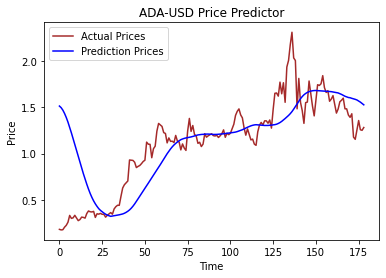

In [150]:
#Visualization of the Prediction
plt.plot(actual_prices, color='brown', label='Actual Prices')
plt.plot(prediction_prices, color='blue', label='Prediction Prices')
plt.title(f"{crypto_currency}-{against_currency} Price Predictor")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend(loc="upper left")

In [ ]:
#Thought iniatially prediction prices is not similar to the actual ones, as the days increase, The predicted values are found 
#to be similar to the actual ones, there is not a greater difference here except when the actual price of ADA was greater 
#than 2.0 (2.30911303),the predicted price was smaller.